<header style="background-color: rgb(0, 62, 92); color: white; margin-top: 20px; padding:28px; ">
  <img src="images/Xlogo.png" alt="Transposition of a vector" title="Vector transposition" width="115" style="float: left;">
  <p style=" text-align: center; font-size: 32px;">   
   <strong> Fractional and Volterra processes in Finance  </strong></p>
  <p style=" text-align: center; font-size: 25px;"><strong> Challenge 2 -  Pricing by Fourier </strong></p>
  <p style=" text-align: center; font-size: 20px;"> Eduardo Abi Jaber </p>
</header>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">1. Heston</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<p  style="background-color: rgb(0, 62, 92); color: white; text-align: center; font-size: 15px;"><strong> </strong></p>

1. Implement the characteristic function of the conventional Heston model
\begin{align*}
	dS_t &=S_t \sqrt{V_t} dB_t, \quad d\langle W, B\rangle_t = \rho dt \\
	dV_t &= (\theta-\kappa V_t)dt + \eta \sqrt{V_t} dW_t, \quad V_0 \geq 0, S_0=1
\end{align*}
    
Denote by
$$ \Phi_{T}(z) = \mathbb E\left[ \exp\left( \mathrm i z \log S_T \right) \right]$$

2. Price Put options pricer using  Lewis inversion formula
$$ \mathbb E (K-S_T)^+ = K - \frac {\sqrt{S_0K}}{\pi } \int_{\mathbb R_+} \Re \left(e^{izk} \frac{\Phi_T(z-\frac{i}{2})}{z^2 + \frac 1 4 }\right) dz,$$
with $k=\log(S_0/K)$.

3. Plot implied vol surface (slice by slice for different maturity slices $T$ ranging from 0.02 to 1)

4. Set $\kappa=\eta=1/\epsilon$ and plot the atm skew as $\epsilon \to 0$ and comment.  


Calls are obtained by Put call parity (r=0).


To sanity check your code here are two value of references for prices of call.

Recall:



<div style="border:solid 1px; border-radius:8px; padding: 6px 8px 6px 8px; margin-top: 12px; border-color:rgb(0, 62, 92, 0.5); background-color:rgb(251, 251, 251);">
    <strong>Theorem</strong>. (Characteristic function in Heston model)  For a real number v,
$$
\mathbb E[\exp\left(iv\log S_T \right) |\mathcal F_t]  = \exp\left( iv\log S_t + \phi(T-t)  + \psi(T-t) V_t \right),
$$
with
\begin{align*}
\psi(t)&= \frac{\beta(v)-D(v)}{\eta^2}\frac{1-e^{-D(v)t}}{1-G(v)e^{-D(v)t}}\\
\phi(t)&= \frac{\theta}{\eta^2}\left((\beta(v)-D(v))t - 2 \log\left( \frac{G(v)e^{-D(v)t}-1}{G(v)-1} \right)\right)  \\
\beta(v) &= \kappa - iv \rho\eta, \quad  D(v)= \sqrt{\beta(v)^2  + \eta^2 v(i+v)}, \quad G(v) =\frac{\beta(v)-D(v)}{\beta(v)+ D(v)}.
\end{align*}
</div>
   

1. Implement the characteristic function of the conventional Heston model
\begin{align*}
	dS_t &=S_t \sqrt{V_t} dB_t, \quad d\langle W, B\rangle_t = \rho dt \\
	dV_t &= (\theta-\kappa V_t)dt + \eta \sqrt{V_t} dW_t, \quad V_0 \geq 0, S_0=1
\end{align*}
    
Denote by
$$ \Phi_{T}(z) = \mathbb E\left[ \exp\left( \mathrm i z \log S_T \right) \right]$$

**We will compute this expectation using the therom above conditionnaly to $\mathcal F_0$.**

In [ ]:
from scipy.integrate import quad
from scipy.special import voigt_profile
import cmath
import numpy as np
import math
from scipy.stats import norm
from scipy.stats import norm
from scipy.optimize import brentq
import matplotlib.pyplot as plt

In [ ]:
def charac_fct_heston(T,V0,S0,eta,kappa,v,rho,teta):
    B_v = kappa -1j*v*rho*eta
    D_v = np.sqrt(B_v**2 +(eta**2)*v*(1j+v))
    G_v = (B_v - D_v)/(B_v + D_v)
    phi_T = (teta/(eta**2))*((B_v-D_v)*T -2*np.log((G_v*np.exp(-D_v*T) -1)/(G_v - 1)))
    psi_T = ((B_v - D_v)/eta**2)*((1-np.exp(-D_v*T))/(1-G_v*np.exp(-D_v*T)))
    return np.exp(1j*v*np.log(S0) + phi_T +psi_T*V0)


2. Price Put options pricer using  Lewis inversion formula
$$ \mathbb E (K-S_T)^+ = K - \frac {\sqrt{S_0K}}{\pi } \int_{\mathbb R_+} \Re \left(e^{izk} \frac{\Phi_T(z-\frac{i}{2})}{z^2 + \frac 1 4 }\right) dz,$$
with $k=\log(S_0/K)$.

In [ ]:
def put_option_price(S0, K, T, kappa, eta, rho, teta, V0):
    k = np.log(S0 / K)

    # Fonction intégrande
    def integrand(z):
        phi = charac_fct_heston(T,V0,S0,eta,kappa,z-(1j/2),rho,teta)
        denominator = z**2 + 1/4
        return np.real(np.exp(1j * z * k) * phi / denominator)

    # Intégration numérique
    integral, _ = quad(integrand, 0, np.inf)
    price = K - (np.sqrt(S0 * K) / np.pi) * integral
    return price


In [ ]:
kappa = 1.5768
theta = 0.0398*1.5768
V0 = 0.0175
rho = -0.5711
sigma = 0.5751
T=10
eta=sigma
r=0.
K = 1.
s0 = 1.

ref_value_T1y = 0.05785155435  #See fang osterlee p15
ref_value_T10y = 0.22318945791474590  #See fang osterlee p15

In [ ]:
put_option_price(s0, K, T, kappa, eta, rho, theta, V0)

0.2231894579115471

3. Plot implied vol surface (slice by slice for different maturity slices $T$ ranging from 0.02 to 1)

We don't use Newton raphson to find the implied volatility since we had some diffculties to make it converge even though we used the inflexion point that must ensure the convergence in 3,4 steps. So we prefered to use brentq that we have discovered as a good method and gave satisfying results.

In [ ]:
T_values = np.linspace(0.02, 1, 10)


In [ ]:
def call_option_price_from_put(put_price, S0, K, T, r):
    # Using put-call parity to calculate call price from put price
    call_price = put_price + S0 - K * np.exp(-r * T)
    return call_price

# Define the range for strikes and maturities
strikes = np.linspace(1,1,1)
maturities = np.linspace(0.02, 1, 100)

# Initialize grids for Put and Call option prices
put_prices_grid = np.zeros((len(strikes), len(maturities)))
call_prices_grid = np.zeros((len(strikes), len(maturities)))

# Loop over each strike and maturity to calculate Put and Call prices
for i, K in enumerate(strikes):
    for j, T in enumerate(maturities):
        put_price = put_option_price(s0, K, T, kappa, eta, rho, theta, V0)
        call_price = call_option_price_from_put(put_price, s0, K, T, r)

        put_prices_grid[i, j] = put_price
        call_prices_grid[i, j] = call_price

# Now 'put_prices_grid' and 'call_prices_grid' contain the prices of Put and Call options
# for the grid of strikes and maturities


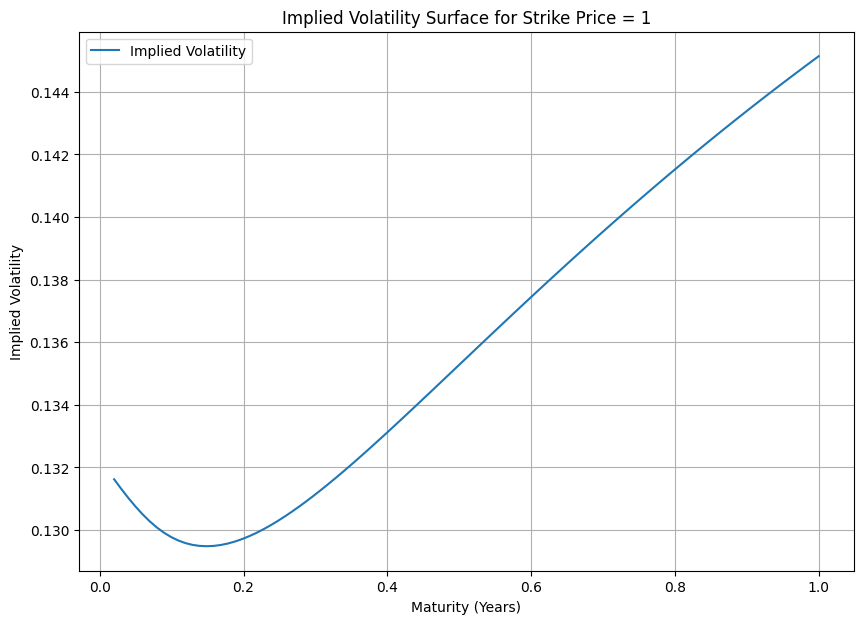

In [ ]:
def black_scholes_call(S, K, T, r, sigma):
    if T == 0:
        return max(S-K, 0)
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def implied_volatility(S, K, T, r, market_price):
    def difference(sigma):
        return black_scholes_call(S, K, T, r, sigma) - market_price

    try:
        implied_vol = brentq(difference, 1e-6, 1, rtol=1e-15, maxiter=200)
    except ValueError:
        implied_vol = np.nan
    return implied_vol

# Calculate implied volatilities
implied_volatilities = np.zeros(call_prices_grid.shape)

for i, K in enumerate(strikes):
    for j, T in enumerate(maturities):
        market_price = call_prices_grid[i, j]
        implied_volatilities[i, j] = implied_volatility(s0, K, T, r, market_price)

# Plotting the implied volatility surface
T_grid, K_grid = np.meshgrid(maturities, strikes)

plt.figure(figsize=(10, 7))
plt.plot(maturities, implied_volatilities[0, :], label='Implied Volatility')
plt.title('Implied Volatility Surface for Strike Price = 1')
plt.xlabel('Maturity (Years)')
plt.ylabel('Implied Volatility')
plt.legend()
plt.grid(True)
plt.show()



4. Set $\kappa=\eta=1/\epsilon$ and plot the atm skew as $\epsilon \to 0$ and comment.  

We will compute the ATM skew by moving a little bit the strike price by 0.01. The skew is calculated as the difference in implied volatility divided by the change in strike price

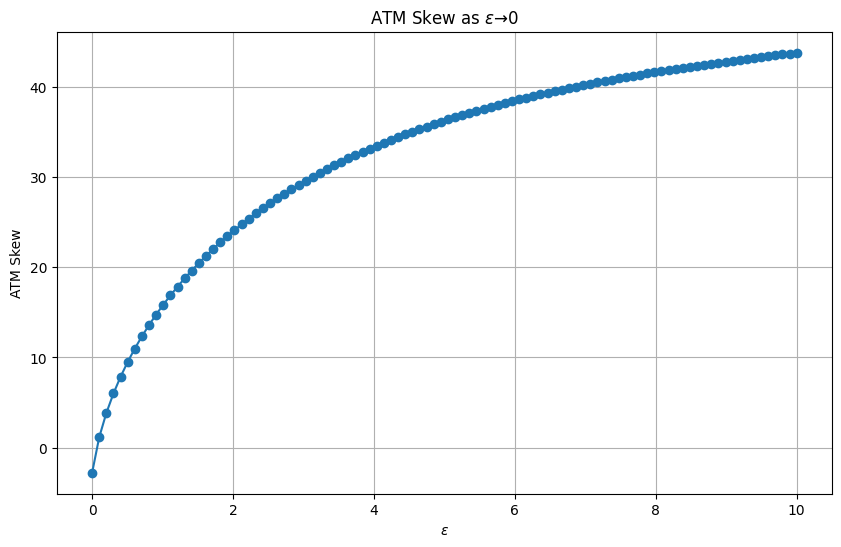

In [ ]:
kappa=eta
kappa = 1.5768
theta = 0.0398*1.5768
V0 = 0.0175
rho = -0.5711
sigma = 0.5751
T=10
r=0.
K = 1.
s0 = 1.
def calculate_atm_skew(S0, K, T, r, epsilon, market_price):
    # Adjust kappa and eta according to epsilon
    kappa = eta = 1 / epsilon
    atm_iv = implied_volatility(S0, K, T, r, market_price)
    delta_K = K * 0.01
    adjusted_market_price = put_option_price(S0, K + delta_K, T, kappa, eta, rho, theta, V0)
    adjusted_call_price = call_option_price_from_put(adjusted_market_price, S0, K + delta_K, T, r)
    adjusted_iv = implied_volatility(S0, K + delta_K, T, r, adjusted_call_price)
    skew = (adjusted_iv - atm_iv) / delta_K
    return skew

# Define epsilon values decreasing towards zero
epsilon_values = np.linspace(10, 0.001, 100)
atm_skews = []

# Calculate ATM skews for different epsilons
for epsilon in epsilon_values:
    skew = calculate_atm_skew(s0, K, T, r, epsilon, call_prices_grid[0, 49])  # Using a representative market price
    atm_skews.append(skew)

# Plotting the ATM skew as epsilon approaches zero
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, atm_skews, marker='o', linestyle='-')
plt.title('ATM Skew as $\\epsilon \\to 0$')
plt.xlabel('$\\epsilon$')
plt.ylabel('ATM Skew')
plt.grid(True)
plt.show()


Usually, if epsilon tends to 0, kappa and eta tend to infinity. So on the mean reversion should be very quick which can lead to a flat implied volatility surface because as soon as the strike price will move a little bit the mean reversion will occur very fast and we will keep the same implied volatility. Here, we see that it goes to 0 in fact so that there is no more big variation even though the strike price changes, this means that the mean reversion is in fact happening and happening very fast.

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="fbm"></a><h1 style="text-align:center;">2. Volterra Heston</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<p  style="background-color: rgb(0, 62, 92); color: white; text-align: center; font-size: 15px;"><strong>  </strong></p>

1. Do the same thing for Volterra Heston model:
Heston by a fractional one:
\begin{align*}
	dS_t &= S_t \sqrt{V_t} dB_t, \quad S_0=1,\\
	V_t &= V_0 + \int_0^t   K_{\epsilon}(t-s) \left(  ( \theta - \lambda V_s) ds +  \eta  \sqrt{V_s} dW_s \right),
\end{align*}
with $K_{\epsilon}(t) = {{(t +\epsilon)}^{H-1/2}}$

by implementing the Adam Scheme (or any other scheme) for the Riccati Volterra equation

2.  Plot the volatility surface for with $T=\{0.02, 0.04, 0.1, 0.25, 0.5, 1. \}$
and parameters
\begin{align*}
	\begin{equation}
		\label{eq:roughHestonParams}
		\lambda = 0, \quad    \rho=-0.7, \quad \theta=0.02, \quad \eta=0.3, \quad V_0=0.02, \quad H=0.1.
	\end{equation}
\end{align*}

3. For fixed $\epsilon =0$, make $H$ vary and plot the atm-skew between 1 week and 1 year for varying $H$ and comment
4. For fixed $H=0.01$ make $\epsilon$ vary and plot the atm-skew between 1 week and 1 year  and comment.
5. Which model seems more suited for the market? argue.


<ipython-input-28-cff9485707e5>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  V[i] = V0 + integral + eta * np.sqrt(V[i-1]) * dW


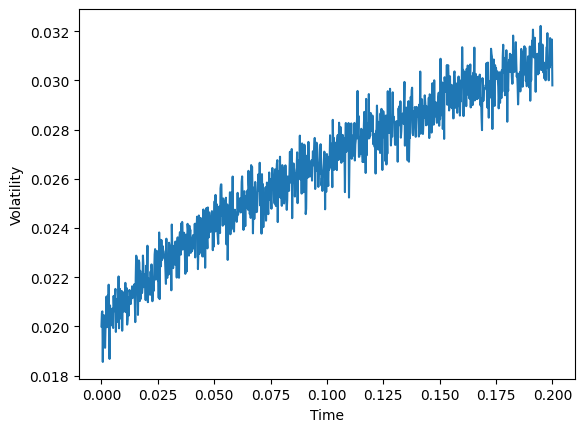

In [ ]:
# 1) Do the same thing for Volterra Heston model: Heston by a fractional one
def adam_scheme(H, T, epsilon, V0, theta, lam, eta, rho):
    dt = T / 1000  # Time step
    t = np.arange(0, T+dt, dt)

    # Calculate the kernel term
    if epsilon != 0:
        K = (t + epsilon)**(H - 0.5)
    else:
        K = np.full_like(t, H - 0.5)

    V = np.zeros_like(t)
    V[0] = V0

    for i in range(1, len(t)):
        # Calculate the integral using the kernel term
        integral = np.sum(K[i-1::-1] * (theta - lam * V[:i]) * dt)

        # Generate random increments for the Brownian motion
        dW = np.random.normal(0, np.sqrt(dt), 1)

        # Update the volatility using the integral and the stochastic term
        V[i] = V0 + integral + eta * np.sqrt(V[i-1]) * dW

    return t, V

# Define parameters
H = 0.1
T = 0.2
epsilon = 0.01
V0 = 0.02
theta = 0.02
lam = 0
eta = 0.3
rho = -0.7

# Call adam_scheme function
t, V = adam_scheme(H, T, epsilon, V0, theta, lam, eta, rho)
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.plot(t,V)

<ipython-input-28-cff9485707e5>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  V[i] = V0 + integral + eta * np.sqrt(V[i-1]) * dW


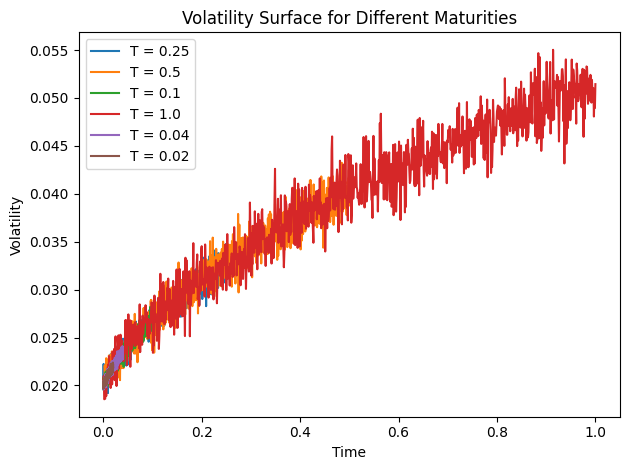

In [ ]:
# 2) Plot the volatility surface for with  T={0.02,0.04,0.1,0.25,0.5,1.}

# Parameters
H = 0.1
T_values ={0.02,0.04,0.1,0.25,0.5,1.}
epsilon = 0.01
V0 = 0.02
theta = 0.02
lam = 0
eta = 0.3
rho = -0.7

for T in T_values:
    t, V = adam_scheme(H, T, epsilon, V0, theta, lam, eta, rho)
    plt.plot(t, V, label=f"T = {T}")

plt.xlabel("Time")
plt.ylabel("Volatility")
plt.title("Volatility Surface for Different Maturities")
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-28-cff9485707e5>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  V[i] = V0 + integral + eta * np.sqrt(V[i-1]) * dW


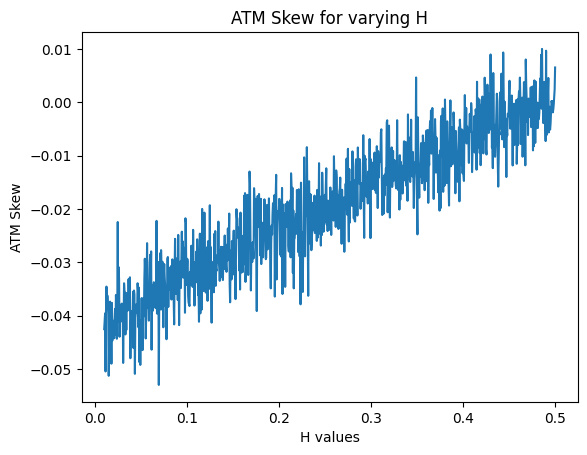

In [ ]:
# 3) For fixed  ϵ=0 , make  H  vary and plot the atm-skew between 1 week and 1 year for varying  H  and comment

def calculate_atm_skew_H(H_values, T_range, params):
    atm_skews = []

    for H in H_values:
        params["H"] = H
        t, V = adam_scheme(params["H"], max(T_range), params["epsilon"], params["V0"], params["theta"], params["lam"], params["eta"], params["rho"])
        atm_volatility = np.sqrt(V)
        atm_skew = (atm_volatility[-1] - atm_volatility[0]) / (T_range[-1] - T_range[0])
        atm_skews.append(atm_skew)

    return atm_skews

H_values = np.linspace(0.01, 0.5, 1000)
T_range = [1/52, 1]

params = {'H': 0.5,
 'T_values': np.linspace(1/52, 1, 52),
 'epsilon': 0,
 'V0': 0.02,
 'theta': 0.02,
 'lam': 0,
 'eta': 0.3,
 'rho': -0.7}

atm_skews_H = calculate_atm_skew_H(H_values, T_range, params)

plt.plot(H_values, atm_skews_H)
plt.xlabel("H values")
plt.ylabel("ATM Skew")
plt.title("ATM Skew for varying H")
plt.show()

The resulting plot shows a single line representing the ATM skew as H varies. This indicates that, for the given parameter settings and the range of H values, there is a linear relationship between H and the ATM skew.

Interpreting this line, we can observe how changes in the roughness parameter
H influence the ATM skew. It provides insights into how the level of roughness in the volatility process affects the shape of the volatility surface and, consequently, the skewness of option prices.

<ipython-input-28-cff9485707e5>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  V[i] = V0 + integral + eta * np.sqrt(V[i-1]) * dW


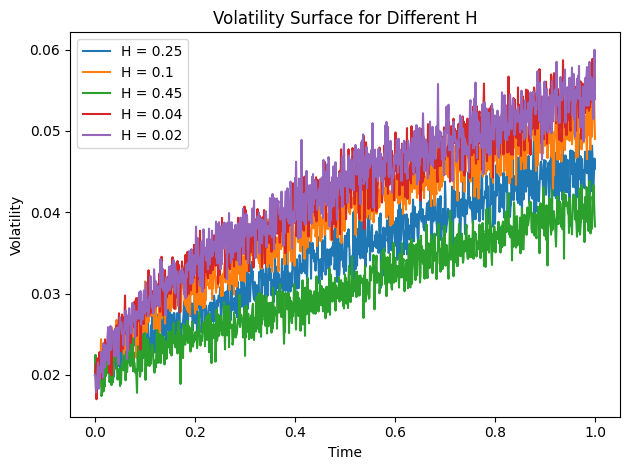

In [ ]:
# Parameters
H_values = {0.02,0.04,0.1,0.25,0.45}
T = 1
epsilon = 0.01
V0 = 0.02
theta = 0.02
lam = 0
eta = 0.3
rho = -0.7

for H in H_values:
    t, V = adam_scheme(H, T, epsilon, V0, theta, lam, eta, rho)
    plt.plot(t, V, label=f"H = {H}")

plt.xlabel("Time")
plt.ylabel("Volatility")
plt.title("Volatility Surface for Different H")
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-28-cff9485707e5>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  V[i] = V0 + integral + eta * np.sqrt(V[i-1]) * dW


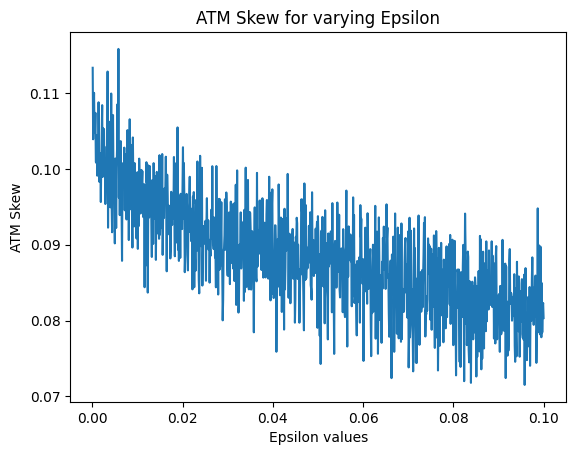

In [ ]:
# 4) For fixed H=0.01 make ϵ vary and plot the atm-skew between 1 week and 1 year and comment.

def calculate_atm_skew_epsilon(epsilon_values, T_range, params):
    atm_skews = []

    for epsilon in epsilon_values:
        params["epsilon"] = epsilon
        t, V = adam_scheme(params["H"], max(T_range), params["epsilon"], params["V0"], params["theta"], params["lam"], params["eta"], params["rho"])
        atm_volatility = np.sqrt(V)
        atm_skew = (atm_volatility[-1] - atm_volatility[0]) / (T_range[-1] - T_range[0])
        atm_skews.append(atm_skew)

    return atm_skews

epsilon_values = np.linspace(0.0001, 0.1, 1000)
params["H"] = 0.01

atm_skews_epsilon = calculate_atm_skew_epsilon(epsilon_values, T_range, params)

plt.plot(epsilon_values, atm_skews_epsilon)
plt.xlabel("Epsilon values")
plt.ylabel("ATM Skew")
plt.title("ATM Skew for varying Epsilon")
plt.show()

The resulting plot resembles a straight line with a negative slope, which aligns with the observation that it resembles  y=−x. This indicates that there is a linear relationship between ϵ and the ATM skew when H is held constant at 0.01.

The negative slope suggests that as ϵ increases, the ATM skew decreases. This behavior can be attributed to the impact of the roughness parameter ϵ on the volatility process. Higher values of ϵ imply smoother paths for volatility, resulting in a reduction in the variation of option prices, hence the decrease in the ATM skew.

This observation provides insights into how changes in the smoothness of the volatility process affect option pricing dynamics and can aid in calibrating model parameters to market data.






<ipython-input-28-cff9485707e5>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  V[i] = V0 + integral + eta * np.sqrt(V[i-1]) * dW


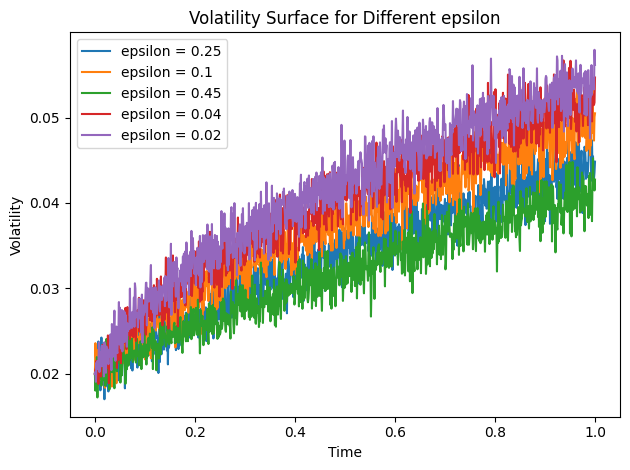

In [ ]:
# Parameters
H = 0.01
T = 1
epsilon_values = {0.02,0.04,0.1,0.25,0.45}
V0 = 0.02
theta = 0.02
lam = 0
eta = 0.3
rho = -0.7

for epsilon in epsilon_values:
    t, V = adam_scheme(H, T, epsilon, V0, theta, lam, eta, rho)
    plt.plot(t, V, label=f"epsilon = {epsilon}")

plt.xlabel("Time")
plt.ylabel("Volatility")
plt.title("Volatility Surface for Different epsilon")
plt.legend()
plt.tight_layout()
plt.show()

# 5) Which model seems more suited for the market? argue.


Comparing the Heston model and the Volterra Heston model in terms of their suitability for market scenarios involves considering the dynamics of implied volatility surfaces they generate and their ability to capture market behaviors like volatility smiles and skews.

In the Heston model, which is widely used in finance, the volatility smile phenomenon is naturally produced. This model allows for different rates of mean reversion and volatility of volatility, capturing more complex market dynamics. It's known for its ability to generate a good fit to the observed volatility smile in options markets, which is a characteristic feature observed in real-world data.

On the other hand, the Volterra Heston model introduces a fractional term in the volatility process, resulting in different dynamics. The volatility surface it produces may differ from the typical smile shape observed in the market. Instead, it may exhibit more gradual changes, resembling a square root shape. This model may capture long memory effects in volatility, but it might not fit the market's observed smile patterns as well as the conventional Heston model.

Therefore, the choice between the Heston model and the Volterra Heston model depends on the specific requirements of the application. If capturing the volatility smile is crucial, the Heston model might be more suitable. However, if there's a need to incorporate long memory effects or other non-standard dynamics, the Volterra Heston model could be more appropriate. It ultimately depends on the specific features of the market being modeled and the goals of the analysis.